# Задание 6

## 1. Wiki philosophy (0.5 баллов)
Существует шуточный «закон Философии» для статей Википедии: если переходить по
первой нормальной ссылке в статье, то рано или поздно мы придем на статью о философии.
Ваша задача заключается в том, чтобы проверить этот закон.
Для этого нужно написать программу, которая получает на вход ссылку на статью Википедии, а потом циклически переходит по первой нормальной ссылке и повторяет эту операцию
(до тех пор, пока не будет достигнута статья о философии, или ссылки не зациклятся). Нормальной ссылкой будем называть ссылку, которая находится в основном содержании статьи,
не в инфобоксах и не в служебных блоках, написана синим цветом (красный соответствует
несуществующей статье), не курсивом, не являтся сноской и не находится в скобках.

<b>Результат</b> должен представлять из себя несколько статистик (проверьте не менее 100 стр., <i>больше - лучше</i>):
* Описание алгоритма, как вы решали, стр. по философии или нет?
* Количество начальных ссылок vs Количество конечных тем страниц (0 - стр. не по философии, 1 - по философии).
* Гистограмма длин путей.
* Соотношений успешных и неуспешных запросов.
* Что еще можно тут придумать? :)

<b>Обратите внимание</b>, что для проверки нормальности не обязательно разбирать таблицы стилей и
проверять цвет и т.п., достаточно сделать, чтобы программа работала для текущей верстки
википедии (например, можно использовать атрибут class у тегов).
Для удобства проверки сделайте, чтобы последовательность переходов выводилась на
экран.

<b>Внимание.</b> Чтобы не создавать большую нагрузку на сервер Википедии, сделайте так,
чтобы ваша программа делала не более 2-х запросов в секунду. Для этого воспользуйтесь
функцией sleep из модуля time.

<b>PS</b> Лучше выполнять не в ipython notebook, а прислать отчет в pdf и код.

__Описание алгоритма__  
Для поиска нормальной ссылки напишем функцию `find_normal_ref`, в котором будем с помощью BeautifulSoup искать все `p` тэги, затем `a` тэги, из них брать `href`, и затем проверять ее на нормальность с помощью функции `url_is_suitable`, дополнительно учитывая атрибут `class` у ссылки.

In [50]:
from urllib import request
from bs4 import BeautifulSoup
from time import sleep

class WikipediaCrawler:
    
    def __init__(self, desired_page='/wiki/Philosophy'):
        # self.num_steps = 0
        self.visited_links = []
        self.desired_page = desired_page
    
    def url_is_suitable(self, url):
        if url is None or not url.startswith('/wiki/') or url in self.visited_links or ':' in url:
            return False
        return True
    
    def find_normal_ref(self, url):
        web_url = request.urlopen('http://en.wikipedia.org' + url).read()
        soup = BeautifulSoup(web_url)
        
        paragraphs = soup.find_all('p')
        for p in paragraphs:
            links = p.find_all('a')
            for l in links:
                url = l.get('href')
                class_param = l.get('class')
                if class_param != 'new' and self.url_is_suitable(url):
                    return l
        return False
    
    def crawl(self, max_iteration=100):
        self.num_steps = 0
        current_page = '/wiki/Special:Random'
        reached_page = False
        self.visited_links = []
        
        while not reached_page:
            if self.num_steps == max_iteration:
                return False
            
            url = self.find_normal_ref(current_page)
            
            if url:
                current_page = url.get('href')
                print('Step: {}, current url: {}'.format(self.num_steps + 1, current_page))
                
                if current_page == self.desired_page:
                    reached_page = True
                self.visited_links.append(current_page)
                
            self.num_steps += 1
            sleep(1.)
        
        print('\n')
        
        return True

In [51]:
crawler = WikipediaCrawler()
num_experiments = 100
successful_attempts = 0
unsuccessful_attempts = 0
steps = []

for i in range(num_experiments):
    reached = crawler.crawl()
    if reached:
        successful_attempts += 1
        steps.append(crawler.num_steps)
    else:
        unsuccessful_attempts += 1

Step: 1, current url: /wiki/DOS
Step: 2, current url: /wiki/Disk_Operating_System
Step: 3, current url: /wiki/Operating_system
Step: 4, current url: /wiki/System_software
Step: 5, current url: /wiki/Software
Step: 6, current url: /wiki/Data_(computing)
Step: 7, current url: /wiki/Mass_noun
Step: 8, current url: /wiki/Linguistics
Step: 9, current url: /wiki/Science
Step: 10, current url: /wiki/Latin
Step: 11, current url: /wiki/Classical_language
Step: 12, current url: /wiki/Language
Step: 13, current url: /wiki/Grammar
Step: 14, current url: /wiki/Ancient_Greek
Step: 15, current url: /wiki/Greek_language
Step: 16, current url: /wiki/Romanization_of_Greek
Step: 17, current url: /wiki/Transliteration
Step: 18, current url: /wiki/Letter_(alphabet)
Step: 19, current url: /wiki/Symbol
Step: 20, current url: /wiki/Idea
Step: 21, current url: /wiki/Philosophy


Step: 1, current url: /wiki/United_States
Step: 2, current url: /wiki/Geographic_coordinate_system
Step: 3, current url: /wiki/Coordi



Step: 1, current url: /wiki/Giddarbaha
Step: 2, current url: /wiki/Municipal_council
Step: 3, current url: /wiki/Legislature
Step: 4, current url: /wiki/Deliberative_assembly
Step: 5, current url: /wiki/Collective
Step: 6, current url: /wiki/Cooperative
Step: 7, current url: /wiki/Autonomy
Step: 8, current url: /wiki/Developmental_psychology
Step: 9, current url: /wiki/Scientific
Step: 10, current url: /wiki/Latin
Step: 11, current url: /wiki/Classical_language
Step: 12, current url: /wiki/Language
Step: 13, current url: /wiki/Grammar
Step: 14, current url: /wiki/Linguistics
Step: 15, current url: /wiki/Science
Step: 16, current url: /wiki/Knowledge
Step: 17, current url: /wiki/Fact
Step: 18, current url: /wiki/Reality
Step: 19, current url: /wiki/Object_of_the_mind
Step: 20, current url: /wiki/Object_(philosophy)
Step: 21, current url: /wiki/Philosophy


Step: 1, current url: /wiki/Municipal_board
Step: 2, current url: /wiki/Australia
Step: 3, current url: /wiki/Geographic_coordinat

Step: 9, current url: /wiki/Symbol
Step: 10, current url: /wiki/Idea
Step: 11, current url: /wiki/Philosophy


Step: 1, current url: /wiki/North_American
Step: 2, current url: /wiki/Continent
Step: 3, current url: /wiki/Landmass
Step: 4, current url: /wiki/Land
Step: 5, current url: /wiki/Earth
Step: 6, current url: /wiki/Planet
Step: 7, current url: /wiki/Sun
Step: 8, current url: /wiki/Star
Step: 9, current url: /wiki/Astronomical_object
Step: 10, current url: /wiki/Physical_object
Step: 11, current url: /wiki/Three-dimensional_space
Step: 12, current url: /wiki/Parameter
Step: 13, current url: /wiki/Ancient_Greek_language
Step: 14, current url: /wiki/Greek_language
Step: 15, current url: /wiki/Romanization_of_Greek
Step: 16, current url: /wiki/Transliteration
Step: 17, current url: /wiki/Letter_(alphabet)
Step: 18, current url: /wiki/Symbol
Step: 19, current url: /wiki/Idea
Step: 20, current url: /wiki/Philosophy


Step: 1, current url: /wiki/Studio_album
Step: 2, current url: /wiki

Step: 23, current url: /wiki/Philosophy


Step: 1, current url: /wiki/GloboNews
Step: 2, current url: /wiki/Globosat
Step: 3, current url: /wiki/Pay_television
Step: 4, current url: /wiki/Subscription_business_model
Step: 5, current url: /wiki/Business_model
Step: 6, current url: /wiki/Explanation
Step: 7, current url: /wiki/Statement_(logic)
Step: 8, current url: /wiki/Logic
Step: 9, current url: /wiki/Ancient_Greek
Step: 10, current url: /wiki/Greek_language
Step: 11, current url: /wiki/Romanization_of_Greek
Step: 12, current url: /wiki/Transliteration
Step: 13, current url: /wiki/Letter_(alphabet)
Step: 14, current url: /wiki/Symbol
Step: 15, current url: /wiki/Idea
Step: 16, current url: /wiki/Philosophy


Step: 1, current url: /wiki/Helena_Maria_Viramontes
Step: 2, current url: /wiki/Fiction
Step: 3, current url: /wiki/Narrative
Step: 4, current url: /wiki/Argumentation
Step: 5, current url: /wiki/Interdisciplinary
Step: 6, current url: /wiki/Discipline_(academia)
Step: 7, current

Step: 8, current url: /wiki/Greek_language
Step: 9, current url: /wiki/Romanization_of_Greek
Step: 10, current url: /wiki/Transliteration
Step: 11, current url: /wiki/Letter_(alphabet)
Step: 12, current url: /wiki/Symbol
Step: 13, current url: /wiki/Idea
Step: 14, current url: /wiki/Philosophy


Step: 1, current url: /wiki/Boxing
Step: 2, current url: /wiki/Combat_sport
Step: 3, current url: /wiki/Contact_sport
Step: 4, current url: /wiki/Sport
Step: 5, current url: /wiki/Competition
Step: 6, current url: /wiki/Goal
Step: 7, current url: /wiki/Idea
Step: 8, current url: /wiki/Philosophy


Step: 1, current url: /wiki/Unincorporated_area
Step: 2, current url: /wiki/Real_property
Step: 3, current url: /wiki/England
Step: 4, current url: /wiki/Europe
Step: 5, current url: /wiki/Continent
Step: 6, current url: /wiki/Landmass
Step: 7, current url: /wiki/Land
Step: 8, current url: /wiki/Earth
Step: 9, current url: /wiki/Planet
Step: 10, current url: /wiki/Sun
Step: 11, current url: /wiki/Star

Step: 3, current url: /wiki/Theatre
Step: 4, current url: /wiki/Performing_art
Step: 5, current url: /wiki/Visual_arts
Step: 6, current url: /wiki/Art#Forms,_genres,_media,_and_styles
Step: 7, current url: /wiki/Human_behavior
Step: 8, current url: /wiki/Human
Step: 9, current url: /wiki/Extinct
Step: 10, current url: /wiki/Organism
Step: 11, current url: /wiki/Biology
Step: 12, current url: /wiki/Natural_science
Step: 13, current url: /wiki/Branch_of_science
Step: 14, current url: /wiki/Science
Step: 15, current url: /wiki/Latin
Step: 16, current url: /wiki/Classical_language
Step: 17, current url: /wiki/Language
Step: 18, current url: /wiki/Grammar
Step: 19, current url: /wiki/Linguistics
Step: 20, current url: /wiki/Theoretical_linguistics
Step: 21, current url: /wiki/Metalanguage
Step: 22, current url: /wiki/Logic
Step: 23, current url: /wiki/Ancient_Greek
Step: 24, current url: /wiki/Greek_language
Step: 25, current url: /wiki/Romanization_of_Greek
Step: 26, current url: /wiki/Tra

Step: 23, current url: /wiki/Idea
Step: 24, current url: /wiki/Philosophy


Step: 1, current url: /wiki/Association_football
Step: 2, current url: /wiki/Team_sport
Step: 3, current url: /wiki/Sport
Step: 4, current url: /wiki/Competition
Step: 5, current url: /wiki/Goal
Step: 6, current url: /wiki/Idea
Step: 7, current url: /wiki/Philosophy


Step: 1, current url: /wiki/Sinclair_Oil_Corporation
Step: 2, current url: /wiki/United_States
Step: 3, current url: /wiki/Geographic_coordinate_system
Step: 4, current url: /wiki/Coordinate_system
Step: 5, current url: /wiki/Geometry
Step: 6, current url: /wiki/Ancient_Greek_language
Step: 7, current url: /wiki/Greek_language
Step: 8, current url: /wiki/Romanization_of_Greek
Step: 9, current url: /wiki/Transliteration
Step: 10, current url: /wiki/Letter_(alphabet)
Step: 11, current url: /wiki/Symbol
Step: 12, current url: /wiki/Idea
Step: 13, current url: /wiki/Philosophy


Step: 1, current url: /wiki/Tropical_forest
Step: 2, current url: /wiki/T

Step: 9, current url: /wiki/Transliteration
Step: 10, current url: /wiki/Letter_(alphabet)
Step: 11, current url: /wiki/Symbol
Step: 12, current url: /wiki/Idea
Step: 13, current url: /wiki/Philosophy


Step: 1, current url: /wiki/Association_football
Step: 2, current url: /wiki/Team_sport
Step: 3, current url: /wiki/Sport
Step: 4, current url: /wiki/Competition
Step: 5, current url: /wiki/Goal
Step: 6, current url: /wiki/Idea
Step: 7, current url: /wiki/Philosophy


Step: 1, current url: /wiki/Gault_Millau
Step: 2, current url: /wiki/Restaurant_guide
Step: 3, current url: /wiki/Restaurant
Step: 4, current url: /wiki/Business
Step: 5, current url: /wiki/Product_(business)
Step: 6, current url: /wiki/Market_(economics)
Step: 7, current url: /wiki/System
Step: 8, current url: /wiki/Interaction
Step: 9, current url: /wiki/Interactivity
Step: 10, current url: /wiki/Information_science
Step: 11, current url: /wiki/Categorization
Step: 12, current url: /wiki/Symbol_grounding_problem
Step: 13

Step: 3, current url: /wiki/Quantification_(science)
Step: 4, current url: /wiki/Mathematics
Step: 5, current url: /wiki/Ancient_Greek
Step: 6, current url: /wiki/Greek_language
Step: 7, current url: /wiki/Romanization_of_Greek
Step: 8, current url: /wiki/Transliteration
Step: 9, current url: /wiki/Letter_(alphabet)
Step: 10, current url: /wiki/Symbol
Step: 11, current url: /wiki/Idea
Step: 12, current url: /wiki/Philosophy


Step: 1, current url: /wiki/Genus
Step: 2, current url: /wiki/Taxonomy_(biology)
Step: 3, current url: /wiki/Biology
Step: 4, current url: /wiki/Natural_science
Step: 5, current url: /wiki/Branch_of_science
Step: 6, current url: /wiki/Science
Step: 7, current url: /wiki/Latin
Step: 8, current url: /wiki/Classical_language
Step: 9, current url: /wiki/Language
Step: 10, current url: /wiki/Grammar
Step: 11, current url: /wiki/Linguistics
Step: 12, current url: /wiki/Theoretical_linguistics
Step: 13, current url: /wiki/Metalanguage
Step: 14, current url: /wiki/Logic
S



Step: 1, current url: /wiki/Nepali_language
Step: 2, current url: /wiki/Devanagari
Step: 3, current url: /wiki/IAST
Step: 4, current url: /wiki/Transliteration
Step: 5, current url: /wiki/Letter_(alphabet)
Step: 6, current url: /wiki/Symbol
Step: 7, current url: /wiki/Idea
Step: 8, current url: /wiki/Philosophy


Step: 1, current url: /wiki/Subspecies
Step: 2, current url: /wiki/Taxonomy_(biology)
Step: 3, current url: /wiki/Biology
Step: 4, current url: /wiki/Natural_science
Step: 5, current url: /wiki/Branch_of_science
Step: 6, current url: /wiki/Science
Step: 7, current url: /wiki/Latin
Step: 8, current url: /wiki/Classical_language
Step: 9, current url: /wiki/Language
Step: 10, current url: /wiki/Grammar
Step: 11, current url: /wiki/Linguistics
Step: 12, current url: /wiki/Theoretical_linguistics
Step: 13, current url: /wiki/Metalanguage
Step: 14, current url: /wiki/Logic
Step: 15, current url: /wiki/Ancient_Greek
Step: 16, current url: /wiki/Greek_language
Step: 17, current url:

In [72]:
print('Number of cases, when the Philosophy page was reached: {}'.format(successful_attempts))
print('Number of cases, when the Philosophy page was not reached: {}'.format(unsuccessful_attempts))
print('Total experiments: {}'.format(num_experiments))

Number of cases, when the Philosophy page was reached: 100
Number of cases, when the Philosophy page was not reached: 0
Total experiments: 100


In [73]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

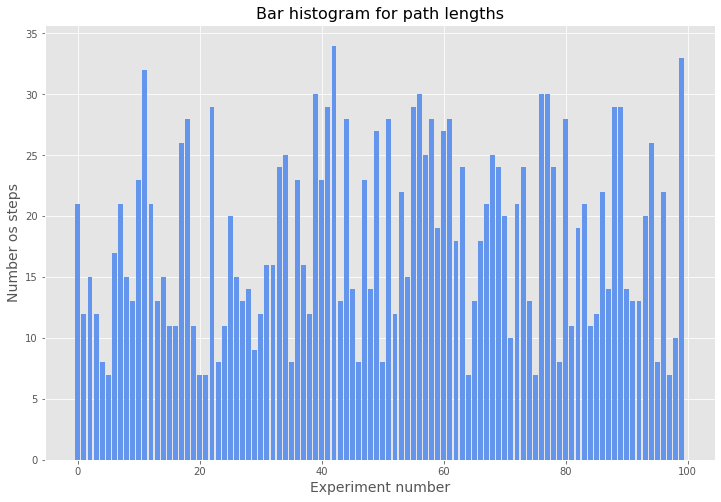

In [74]:
plt.figure(figsize=(12, 8))
plt.bar(range(100), steps, color='cornflowerblue')
plt.title('Bar histogram for path lengths', fontsize=16)
plt.xlabel('Experiment number', fontsize=14)
plt.ylabel('Number os steps', fontsize=14)
plt.show()

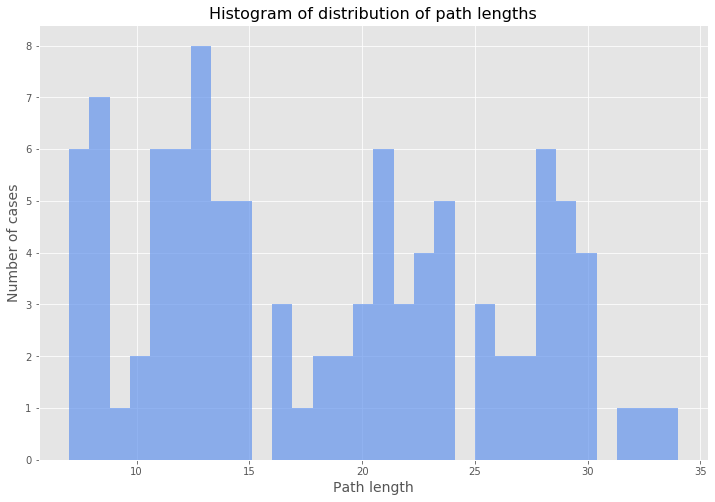

In [75]:
plt.figure(figsize=(12, 8))
plt.hist(steps, color='cornflowerblue', bins=30, alpha=0.7)
plt.title('Histogram of distribution of path lengths', fontsize=16)
plt.xlabel('Path length', fontsize=14)
plt.ylabel('Number of cases', fontsize=14)
plt.show()